# Import the dataset into the code

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# List of feature names
attribute_names = [
   "Sample code number",
   "Clump Thickness",
   "Uniformity of Cell Size",
   "Uniformity of Cell Shape",
   "Marginal Adhesion",
   "Single Epithelial Cell Size",
   "Bare Nuclei",
   "Bland Chromatin",
   "Normal Nucleoli",
   "Mitoses",
   "Class"
]
df.columns=attribute_names
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# all columns 
print(list(df.columns))

# shape of data
print(f'The dataset has shape {df.shape}')

['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
The dataset has shape (699, 11)


In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
#check the missing values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

The data has no missing values / null values

In [7]:
df.duplicated().sum()

8

In [8]:
# Replace ? with NaN
df.replace('?', np.nan, inplace=True)

# Count rows with null values
null_rows_count = df.isnull().any(axis=1).sum()

print("Number of rows with null values (including ? as null):", null_rows_count)

Number of rows with null values (including ? as null): 16


# Data Analyse

In [9]:
#Frequency of sample code number
df['Sample code number'].value_counts()

1182404    6
1276091    5
1198641    3
897471     2
1116192    2
          ..
1232225    1
1236043    1
1241232    1
1241559    1
814265     1
Name: Sample code number, Length: 645, dtype: int64

In [11]:
df[df['Sample code number']==1182404]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
136,1182404,4,1,1,1,2,1,2,1,1,2
256,1182404,3,1,1,1,2,1,1,1,1,2
257,1182404,3,1,1,1,2,1,2,1,1,2
265,1182404,5,1,4,1,2,1,3,2,1,2
448,1182404,1,1,1,1,1,1,1,1,1,2
497,1182404,4,2,1,1,2,1,1,1,1,2


<AxesSubplot:xlabel='Marginal Adhesion', ylabel='Count'>

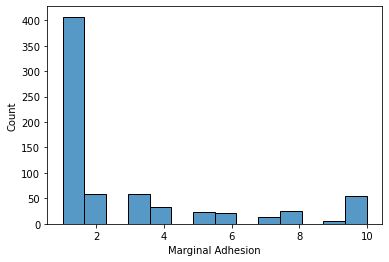

In [18]:
import seaborn as sns
sns.histplot(data=df,x='Marginal Adhesion')

<AxesSubplot:xlabel='Class', ylabel='Count'>

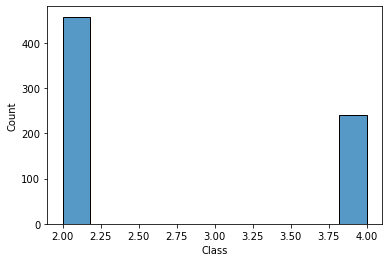

In [13]:
import seaborn as sns
sns.histplot(data=df,x='Class')

In [20]:
#Frequency of class
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [21]:
#Frequency of Clump Thickness
df['Clump Thickness'].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [22]:
#Frequency of Uniformity of Cell Size
df['Uniformity of Cell Size'].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [26]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.1


In [24]:
pip install matplotlib --upgrade

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\sathurjan\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



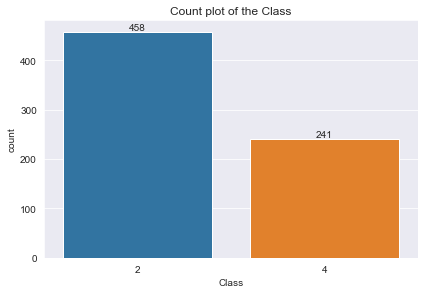

In [27]:
#Frequency of Class in barchart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure()
ax = sns.countplot(x='Class', data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()
plt.title('Count plot of the Class')
plt.show(fig)

<AxesSubplot:>

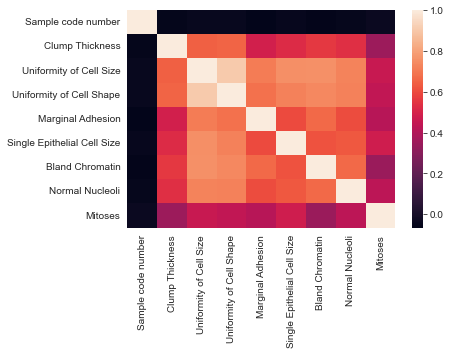

In [28]:
#Correlation between variables
sns.heatmap(df.loc[:, df.columns != 'Class'].corr())

In [29]:
# show Correlation
correlation = df.corr()
print(correlation['Class'].sort_values(ascending = False))

Class                          1.000000
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
Sample code number            -0.080226
Name: Class, dtype: float64


# data preprocessing

In [31]:
# Replace ? with NaN
df.replace('?', np.nan, inplace=True)

# Count rows with null values
null_rows_count = df.isnull().any(axis=1).sum()

print("Number of rows with null values (including ? as null):", null_rows_count)

Number of rows with null values (including ? as null): 16


In [35]:
newData=df.dropna(how='any')
newData

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [36]:
df.duplicated().sum()

8

In [38]:
processingData=newData.drop_duplicates()
processingData

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [71]:
#as type is a categorical need to transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processingData['Class'] = labelencoder.fit_transform(processingData['Class'])
print(processingData['Class'])

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 675, dtype: int64


In [76]:
# Remove the "Sample code number" column
cleanedData = processingData.drop("Sample code number", axis=1)

In [77]:
cleanedData

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [78]:
#Frequency of sample code number
cleanedData['Class'].value_counts()

0    439
1    236
Name: Class, dtype: int64

In [79]:
# Assuming the first 9 columns are the input features and the last column is the target variable
X = cleanedData.iloc[:, :-1]  # Features (first 9 columns)
y = cleanedData.iloc[:, -1]   # Target variable (last column)

In [80]:
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 675, dtype: int64

In [81]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [82]:
print("shape of the x : ",X.shape)
print("shape of the y : ",y.shape)

shape of the x :  (675, 9)
shape of the y :  (675,)


In [117]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {}

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = SVC(kernel='rbf')

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier()

In [118]:
models

{'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbor': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(),
 'Support Vector Machines': SVC(),
 'Decision Trees': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [119]:
#save each predicted value and perfomance measure in each specified indexes
y_pred = {}
accuracy, precision, recall, f1score, elapse_time = {}, {}, {}, {}, {}
accuracy_err, precision_err, recall_err, f1score_err, time_err = {}, {}, {}, {}, {}

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay

# prepare the features and target
standardizer = StandardScaler()
x_label = standardizer.fit_transform(X)
y_label = np.ravel(y)

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)

In [121]:
import time
print("--------------5-Fold Validation---------------\n")
for key in models.keys():
    test_accuracy = np.zeros((n_folds))
    test_precision = np.zeros((n_folds))
    test_recall = np.zeros((n_folds))
    test_f1 = np.zeros((n_folds))
    test_time = np.zeros((n_folds))

    for i, (train_index, test_index) in enumerate(skf.split(x_label, y_label)):
        
        # Measure execution time
        start_time = time.time()
    
        models[key].fit(x_label[train_index], y_label[train_index])
        y_pred[key] = models[key].predict(x_label[test_index])
        
        # Calculate execution time
        end_time = time.time()
        
        # performance metrics
        test_accuracy[i] = accuracy_score(y_label[test_index], y_pred[key])
        test_precision[i] = precision_score(y_label[test_index], y_pred[key])
        test_recall[i] = recall_score(y_label[test_index], y_pred[key])
        test_f1[i] = f1_score(y_label[test_index], y_pred[key])
        test_time[i]= end_time - start_time;
    
    print("\n----"+key+"----")
    print("Accuracies : ",test_accuracy)
    accuracy[key] = test_accuracy.mean()
    accuracy_err[key] = test_accuracy.std()
    
    print("precisions : ",test_precision)
    precision[key] = test_precision.mean()
    precision_err[key] = test_precision.std()
    
    print("recalls : ",test_recall)
    recall[key] = test_recall.mean()
    recall_err[key] = test_recall.std()
    
    print("f1-scores : ",test_f1)
    f1score[key] = test_f1.mean()
    f1score_err[key] = test_f1.std()
    
    print("time : ",test_time)
    elapse_time[key] = test_time.mean()
    time_err[key] = test_time.std()
    

--------------5-Fold Validation---------------


----Naive Bayes----
Accuracies :  [0.94074074 0.94074074 0.96296296 0.97037037 0.97777778]
precisions :  [0.88235294 0.85454545 0.9375     0.95744681 0.95918367]
recalls :  [0.95744681 1.         0.95744681 0.95744681 0.97916667]
f1-scores :  [0.91836735 0.92156863 0.94736842 0.95744681 0.96907216]
time :  [0.00433898 0.00097442 0.00109935 0.00099778 0.00400805]

----K-Nearest Neighbor----
Accuracies :  [0.93333333 0.95555556 0.97037037 0.98518519 0.98518519]
precisions :  [0.95238095 0.88679245 0.95744681 1.         1.        ]
recalls :  [0.85106383 1.         0.95744681 0.95744681 0.95833333]
f1-scores :  [0.8988764  0.94       0.95744681 0.97826087 0.9787234 ]
time :  [0.01082468 0.0096252  0.00901008 0.         0.01565623]

----Logistic Regression----
Accuracies :  [0.94074074 0.94814815 0.97777778 0.97777778 0.98518519]
precisions :  [0.95348837 0.88461538 0.97826087 0.97826087 1.        ]
recalls :  [0.87234043 0.9787234  0.957446

In [122]:
accuracy['Naive Bayes']

0.9585185185185185

In [123]:
accuracy['K-Nearest Neighbor']

0.9659259259259259

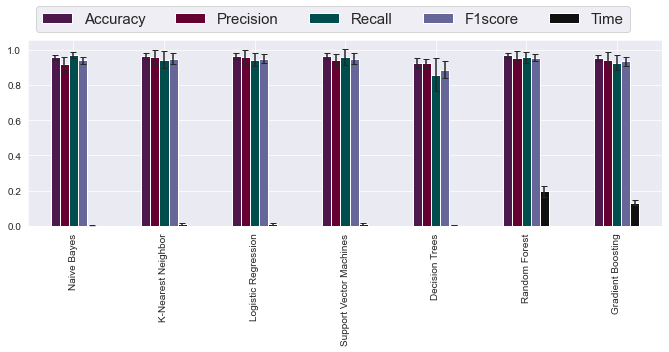

In [152]:
import matplotlib.pyplot as plt
df_model = pd.DataFrame(index=models.keys(), 
                        columns=['Accuracy', 'Precision', 'Recall', 'F1score','Time'])

df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1score'] = f1score.values()
df_model['Time'] = elapse_time.values()

df_model_err = pd.DataFrame(index=models.keys(), 
                            columns=['Accuracy', 'Precision', 'Recall', 'F1score','Time'])

df_model_err['Accuracy'] = accuracy_err.values()
df_model_err['Precision'] = precision_err.values()
df_model_err['Recall'] = recall_err.values()
df_model_err['F1score'] = f1score_err.values()
df_model_err['Time'] = time_err.values()

ax  = df_model.plot.bar(rot=90,color=['#4d194d', '#660033', '#004d4d', '#666699','#101010'],
                        yerr=df_model_err,capsize=3,figsize=(10,5))

ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), 
          loc='lower left', prop={'size': 15})

plt.tight_layout()

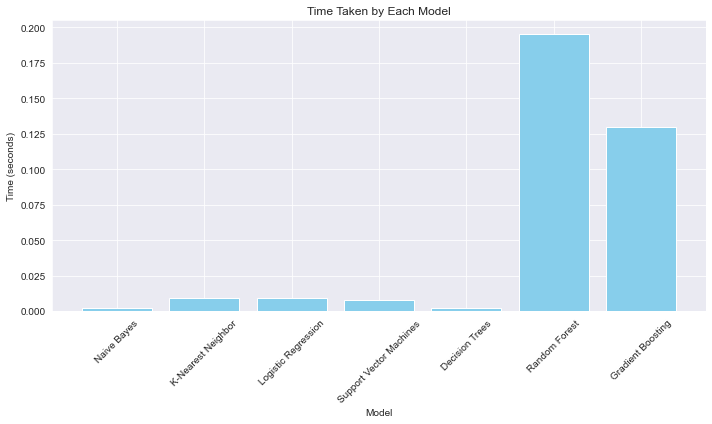

In [158]:
data = {
    'Model': [
        'Naive Bayes',
        'K-Nearest Neighbor',
        'Logistic Regression',
        'Support Vector Machines',
        'Decision Trees',
        'Random Forest',
        'Gradient Boosting'
    ],
    'Time': df_model['Time']
}

df = pd.DataFrame(data)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(df['Model'], df['Time'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Time Taken by Each Model')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

# Show the graph
plt.tight_layout()  # Optional: Adjust layout to prevent label cutoff
plt.show()


In [153]:
df_model

,Accuracy,Precision,Recall,F1score,Time
Naive Bayes,0.958519,0.918206,0.970301,0.942765,0.002284
K-Nearest Neighbor,0.965926,0.959324,0.944858,0.950661,0.009023
Logistic Regression,0.965926,0.958925,0.944858,0.950922,0.009373
Support Vector Machines,0.965926,0.943055,0.961791,0.951464,0.008137
Decision Trees,0.925926,0.924540,0.860550,0.887814,0.002005
Random Forest,0.968889,0.955607,0.957535,0.955689,0.195206
Gradient Boosting,0.955556,0.945856,0.927926,0.935766,0.130017


In [92]:
df_model_err

,Accuracy,Precision,Recall,F1score
Naive Bayes,0.015253,0.042260,0.017066,0.019866
K-Nearest Neighbor,0.019654,0.041525,0.049672,0.029633
Logistic Regression,0.017901,0.039966,0.037160,0.026044
Support Vector Machines,0.019654,0.034311,0.045468,0.029072
Decision Trees,0.016229,0.031526,0.065839,0.027173
Random Forest,0.021263,0.041525,0.051469,0.031895
Gradient Boosting,0.019542,0.044400,0.041751,0.029046


# Save the trained model and load later to use

In [172]:
import pickle

# save the model to disk
filename = 'models.sav'
pickle.dump(models, open(filename, 'wb'))

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_label,y_label,test_size=0.2,random_state=0)

In [174]:
#shape
print("shape of the X_train : ",X_train.shape)
print("shape of the y_train : ",y_train.shape)
print("shape of the X_test : ",X_test.shape)
print("shape of the y_test : ",y_test.shape)

shape of the X_train :  (540, 9)
shape of the y_train :  (540,)
shape of the X_test :  (135, 9)
shape of the y_test :  (135,)


In [176]:
# load the model from disk
import pickle
loaded_model = pickle.load(open(filename, 'rb'))
LR = loaded_model['Decision Trees']
result=LR.score(X_test, y_test)

In [177]:
result

0.9925925925925926